<a href="https://colab.research.google.com/github/Carlosrbrj/DataValidation/blob/main/Daju_Cientes_Valida%C3%A7%C3%A3o_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória de dados - BIUD

Esse notebook tem como objetivo criar validar os dados dos clientes antes de subir na plataforma. Para, isso dividi essa análise em três partes, que também forma 3 datasets. Aqui, iremos iniciar análise a partir dos dados de vendas.

Sendo assim, o código abaixo importar todos os pacotes que poderemos usar nessa análise.

In [ ]:
# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import missingno as ms # para tratamento de missings
from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding

# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

Agora, vamos importar a biblioteca que permite importar um dataset a partir de um link público do google.

In [ ]:
# Esse é o link que será o caminho público do arquivo que montamos.
link_csv = '/content/clientes Daju - valido distc.csv'

In [ ]:
# Lê o arquivo
dataset = pd.read_csv(link_csv)

# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,id,cpf,name,phone,email,gender,born_at,message_phone_validation,sum,count
0,5900306,2088336923,MIRIAM GRYCAJUK,41991132832,miriam_grycajuk@hotmail.com,NaN,NaN,O telefone é válido!,9678.1,7.0
1,5900307,55346162968,NEUZA RUFINO DAMASCENO SERAFINI,65998171713,flaviaaserafini@hotmail.com,NaN,NaN,O telefone é válido!,14593.1,4.0
2,5900308,364284935,ECLAIR DO ROCIO BAPTISTA,42988366606,eclairrocio@gmail.com,NaN,NaN,O telefone é válido!,6874.9,5.0
3,5900310,2276670932,EDILENE LUIZ OZORIO,41996603047,eloozorio@hotmail.com,NaN,NaN,O telefone é válido!,14549.0,14.0
4,5900311,6648850981,MARCOS AURELIO DO VALE,41998640210,marco.av@icloud.com.br,NaN,NaN,O telefone é válido!,39273.6,19.0
5,5900312,1019253959,DIEGO CORDEIRO,41992371356,diego.cordeiro@sjp.pr.gov.br,NaN,NaN,O telefone é válido!,5236.6,4.0
6,5900313,345729960,FABIANO FRANCO,41996479000,f.sappe@terra.com.br,NaN,NaN,O telefone é válido!,3690.3,2.0
7,5900314,50363328904,SAMUEL FARIAS DOMINGUES,42998600109,samuel.farias.domingues@gmail.com,NaN,NaN,O telefone é válido!,15048.6,4.0
8,5900315,3778073974,TATIANA FOGACA,42984059701,tatiana-fogaca@hotmail.com,NaN,NaN,O telefone é válido!,8910.5,13.0
9,5900316,3289448908,ROZALINA FATIMA MORAES DOS SANTOS,42998392516,nt@gmail.com,NaN,NaN,O telefone é válido!,2514.7,1.0


## 1. Análise descritivas

Uma vez carregado o dataset, vamos começar as análises do dataset identificando o seu tamanho, e as informações inciais.

In [ ]:
# Mostra as dimensões do dataset
dataset.shape

(81004, 10)

In [ ]:
# tentativa de contar único
dataset.count()

id                          81004
cpf                         81004
name                        81004
phone                       81004
email                       81004
gender                          0
born_at                       487
message_phone_validation    81003
sum                         81003
count                       81003
dtype: int64

In [ ]:
# Mostra as informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81004 entries, 0 to 81003
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        81004 non-null  int64  
 1   cpf                       81004 non-null  int64  
 2   name                      81004 non-null  object 
 3   phone                     81004 non-null  object 
 4   email                     81004 non-null  object 
 5   gender                    0 non-null      float64
 6   born_at                   487 non-null    object 
 7   message_phone_validation  81003 non-null  object 
 8   sum                       81003 non-null  float64
 9   count                     81003 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 6.2+ MB


In [ ]:
# Verifica a distribuição por telefones válidos
dataset.groupby('message_phone_validation').size()

message_phone_validation
A quantidade de digitos desse telefone é inválida!        1394
O código de área é invalido, no Brasil o código é 55!        9
O nono digito está incorreto, deve ter o valor 9!           74
O numero possui muitos digitos repetidos!                  164
O telefone é válido!                                     79355
Os digitos iniciais não são válidos!                         7
dtype: int64

In [ ]:
# Verifica a distribuição por quantidade
dataset.groupby('count').size()

count
1.0      20892
2.0      15759
3.0      11661
4.0       8417
5.0       6046
         ...  
220.0        1
223.0        1
233.0        1
289.0        1
373.0        1
Length: 152, dtype: int64

In [ ]:
# Verifica a distribuição por quantidade
dataset.groupby('sum').size()

sum
29.9         2
39.9        10
44.9         1
49.9         2
59.9         3
            ..
461635.6     1
501409.0     1
506663.7     1
555707.6     1
800238.4     1
Length: 60476, dtype: int64

In [ ]:
# Verificando as propriedades estatísticas do dataset
dataset.describe()

,id,cpf,gender,sum,count
count,8.100400e+04,8.100400e+04,0.0,81003.000000,81003.000000
mean,5.944078e+06,2.713415e+10,NaN,11590.838352,4.257324
std,2.496752e+04,3.065651e+10,NaN,15567.990338,6.756143
min,5.900306e+06,6.949320e+05,NaN,29.900000,1.000000
25%,5.922529e+06,4.131460e+09,NaN,3015.450000,1.000000
50%,5.944164e+06,8.569904e+09,NaN,6957.200000,3.000000
75%,5.965902e+06,5.192582e+10,NaN,14522.550000,5.000000
max,5.986632e+06,9.998995e+10,NaN,800238.400000,373.000000


In [ ]:
# verificando nulls no dataset
dataset.isnull().sum()

id                              0
cpf                             0
name                            0
phone                           0
email                           0
gender                      81004
born_at                     80517
message_phone_validation        1
sum                             1
count                           1
dtype: int64

<Axes: >

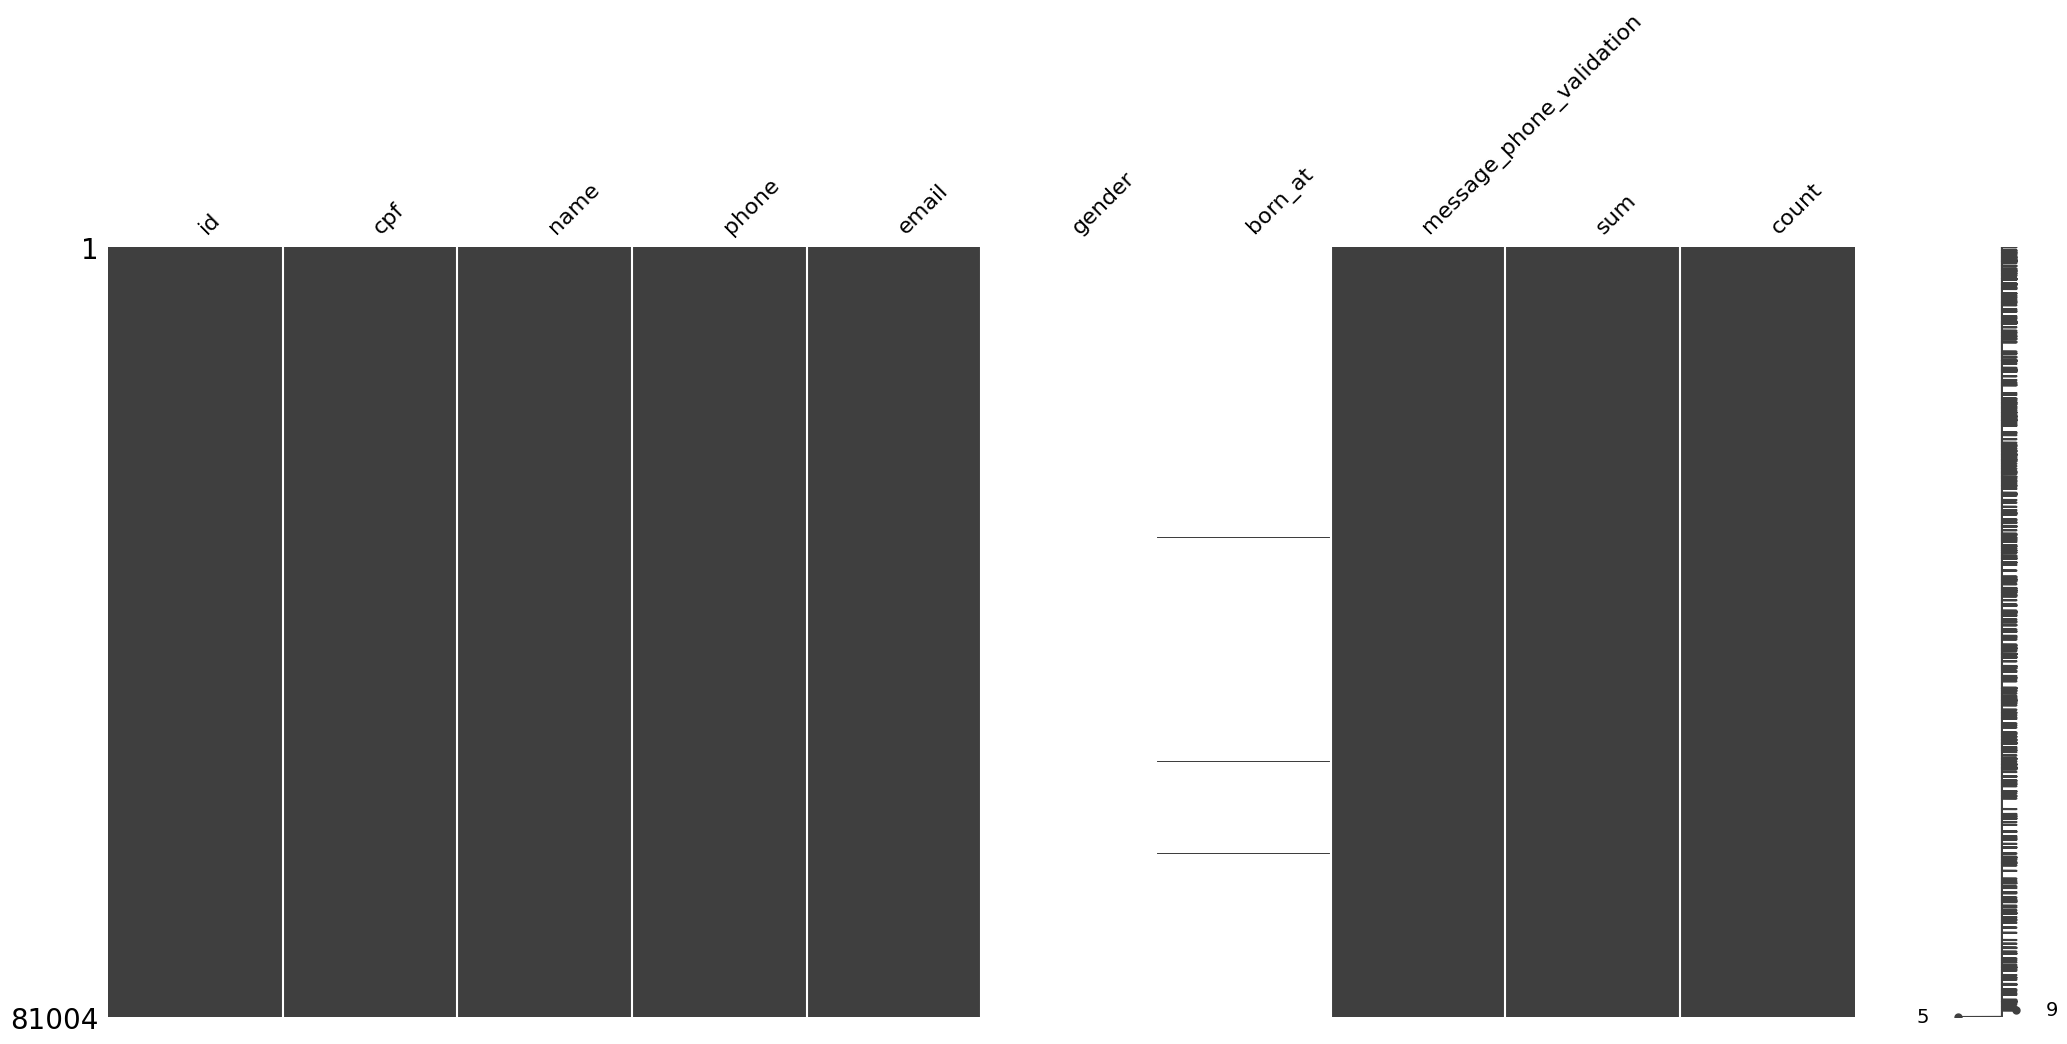

In [ ]:
# exibindo visualização matricial da nulidade do dataset
ms.matrix(dataset)

Inicialmente, conseguimos observar que existem 131.624 IDs únicos na base de dados. Além disso, podemos observar que existem cerca de 130 mil clientes com telefone. Por fim, inicialmente, nenhum cliente possui um valor total de vendas zeradas ou quantidade de compras zeradas.
Antes de darmos início ao tratamento de dados, iremos criar um novo dataset para resguardar o orginal. Além disso, no novo dataset, vamos trocar todos os valores zero por Na.

<Axes: >

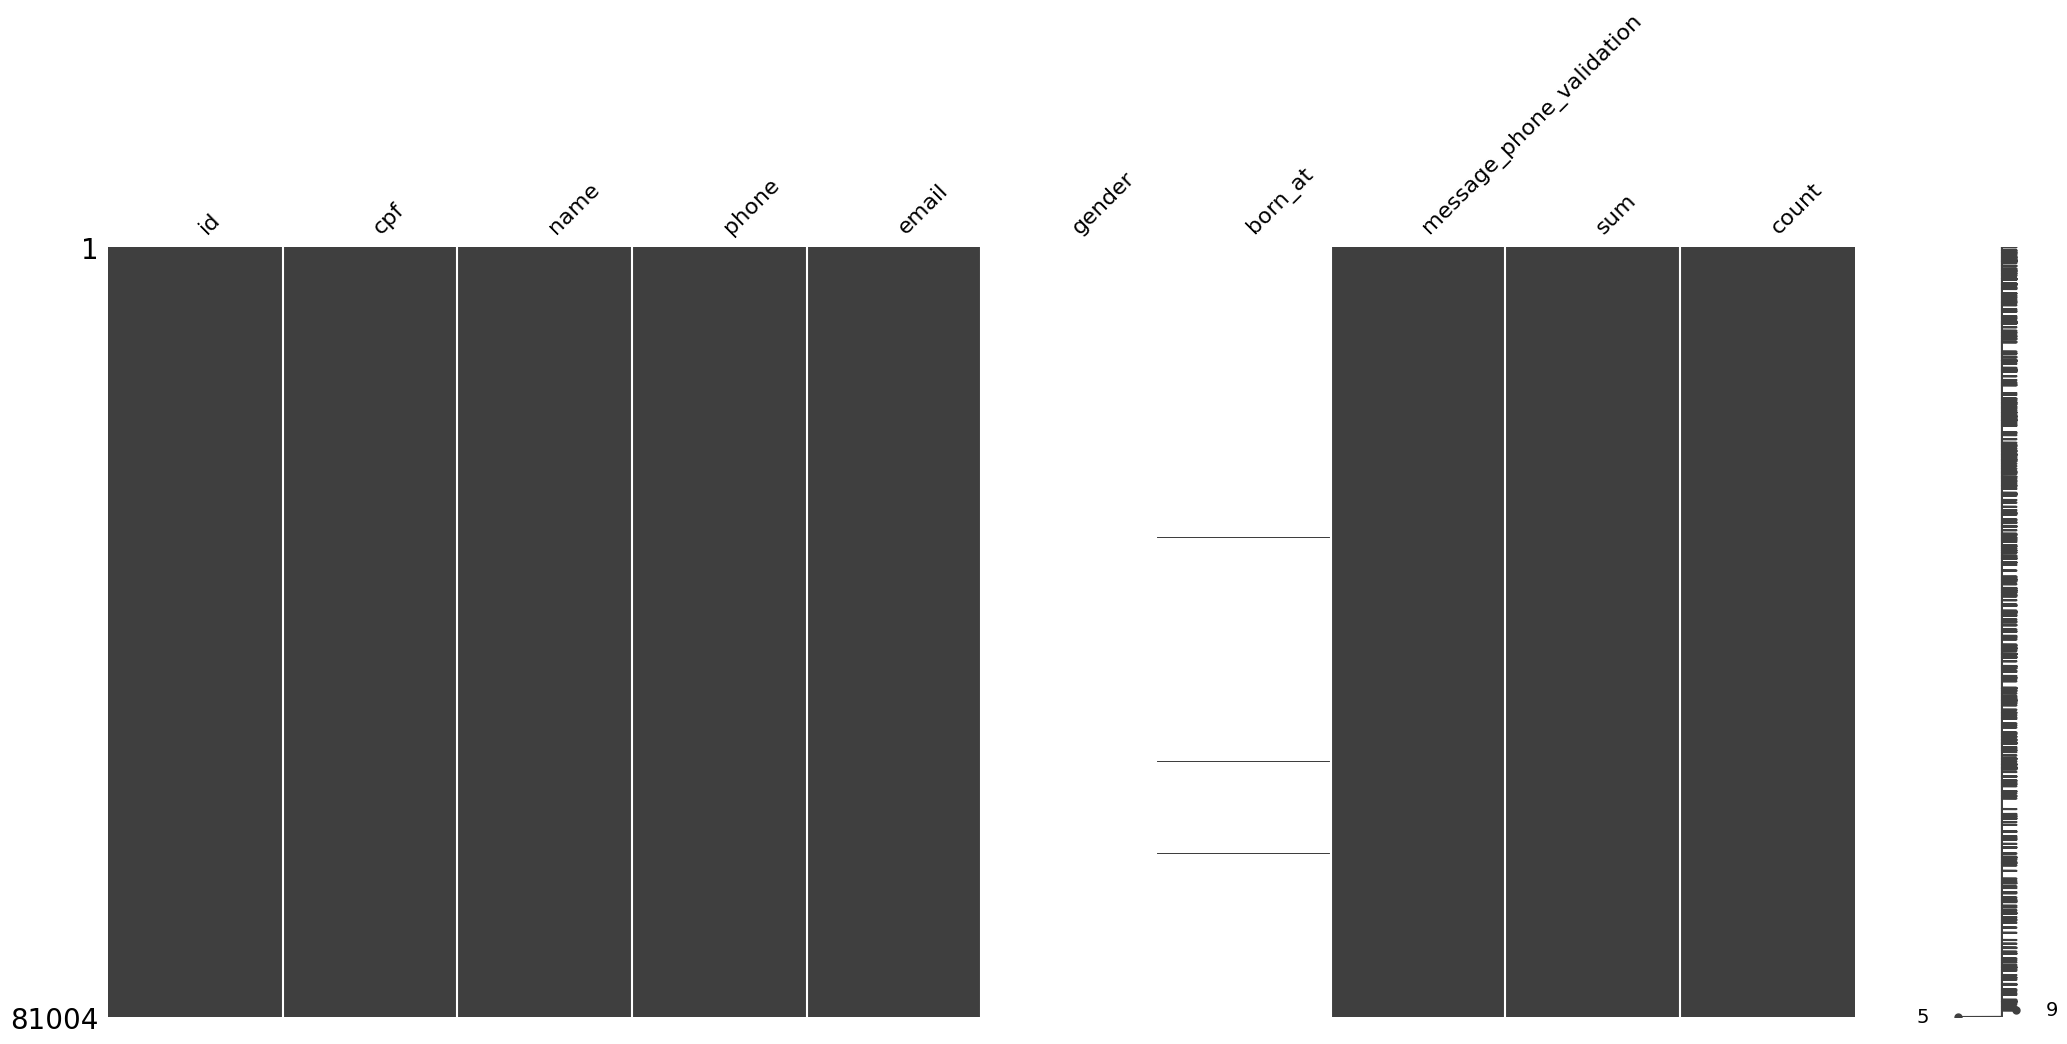

In [ ]:
# salvando um NOVO dataset para tratamento de missings (cuidado para não sobrescrever o dataset original!)

# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas
crek = dataset[col[:]]

# substituindo os zeros por NaN
crek.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(crek)

In [ ]:
# verificando nulls no dataset
crek.isnull().sum()

id                              0
cpf                             0
name                            0
phone                           0
email                           0
gender                      81004
born_at                     80517
message_phone_validation        1
sum                             1
count                           1
dtype: int64

Com essa visualização, podemos observar que existem valores agora considerados nulo no Dataset transformado. Com isso, podemos concluir que, aqui, existem valores abaixo de zero, ainda que não existam valores negativos nas quantidades vendidas.


## 1.2 Visualizações de dados

Agora, vamos anáise visualmente como estão distribuídos esse dataset olhando para os atributos Id e Total_valeu por clientes.

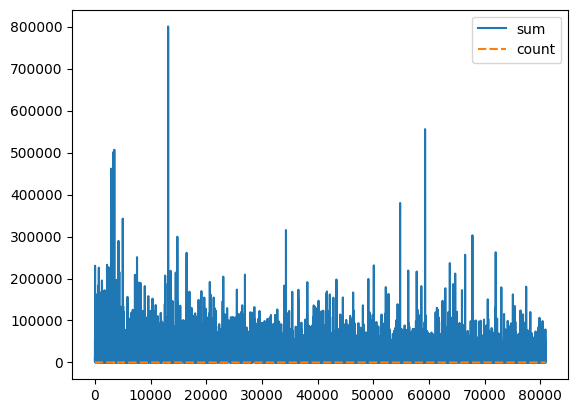

In [ ]:
# gráfico de linhas com Seaborn
sns.lineplot(data=dataset.drop(['cpf', 'name', 'id', 'phone', 'email', 'gender', 'born_at', 'message_phone_validation', ], axis=1));

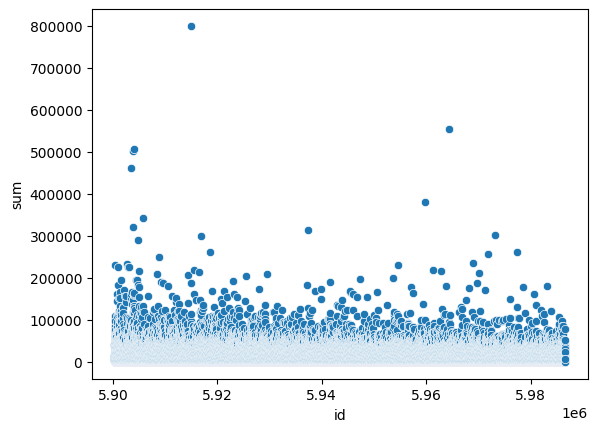

In [ ]:
# scatter plot com Seaborn
sns.scatterplot(x='id', y='sum', data=dataset);

Vamos criar um gráfico de barras que mostre a quantidade de CPFs únicos por quantidade de compras nesse dataset.
O código abaixo prepara os dados e cria a visualização.

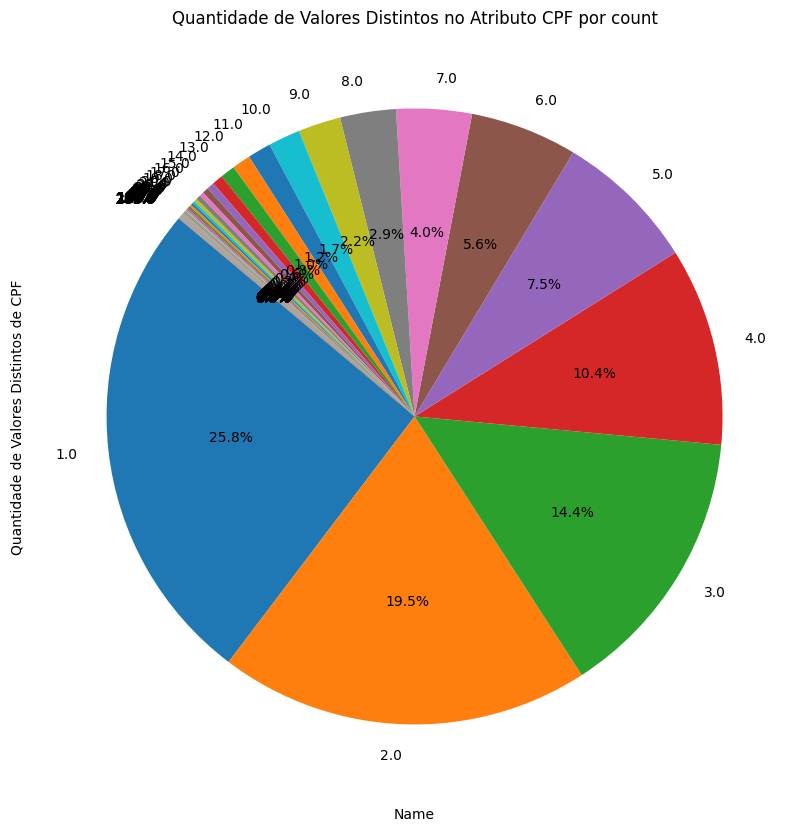

In [ ]:
# Agrupar os dados pelo atributo 'name' e contar os valores distintos no atributo 'id'
grouped_dataset = dataset.groupby('count')['cpf'].nunique().reset_index()
grouped_dataset.columns = ['count', 'distinct_cpf_count']

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 10))
plt.pie(grouped_dataset['distinct_cpf_count'], labels=grouped_dataset['count'], autopct='%1.1f%%', startangle=140)


# Adicionar títulos e rótulos aos eixos
plt.title('Quantidade de Valores Distintos no Atributo CPF por count')
plt.xlabel('Name')
plt.ylabel('Quantidade de Valores Distintos de CPF')

# Ajustar rotação dos rótulos do eixo x para melhor visualização
plt.xticks(rotation=90)

# Mostrar o gráfico
plt.show()